In [1]:
import pandas as pd
import seaborn as sns

tips = sns.load_dataset('tips')

In [2]:
df = pd.DataFrame(tips)
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df.shape

(244, 7)

In [4]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [6]:
print(df['sex'].value_counts())
print("===========================")


print(df['time'].value_counts())
print("===========================")


print(df['smoker'].value_counts())
print("===========================")


print(df['day'].value_counts())
print("===========================")


print(df['size'].value_counts())
print("===========================")

Male      157
Female     87
Name: sex, dtype: int64
Dinner    176
Lunch      68
Name: time, dtype: int64
No     151
Yes     93
Name: smoker, dtype: int64
Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64
2    156
3     38
4     37
5      5
1      4
6      4
Name: size, dtype: int64


In [8]:
grouped = df['tip'].groupby(df['sex'])

In [9]:
grouped.mean()

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

In [10]:
grouped.size()

sex
Male      157
Female     87
Name: tip, dtype: int64

In [11]:
import numpy as np
sex = dict(grouped.mean())
sex

{'Male': 3.0896178343949043, 'Female': 2.833448275862069}

In [13]:
x = list(sex.keys())
x

['Male', 'Female']

In [14]:
y = list(sex.values())
y

[3.0896178343949043, 2.833448275862069]

Text(0.5, 1.0, 'Tip by Sex')

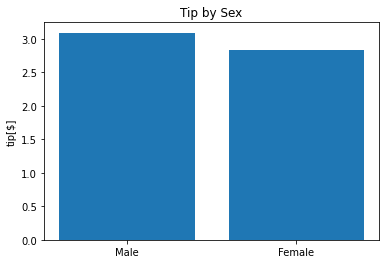

In [15]:
import matplotlib.pyplot as plt

plt.bar(x = x, height = y)
plt.ylabel('tip[$]')
plt.title('Tip by Sex')

<AxesSubplot:xlabel='sex', ylabel='tip'>

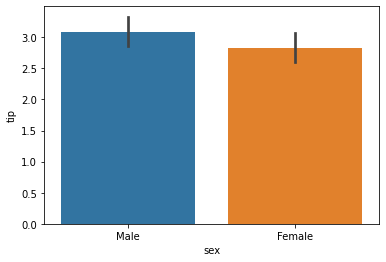

In [16]:
sns.barplot(data = df, x = 'sex', y = 'tip')

Text(0.5, 1.0, 'Tip by sex')

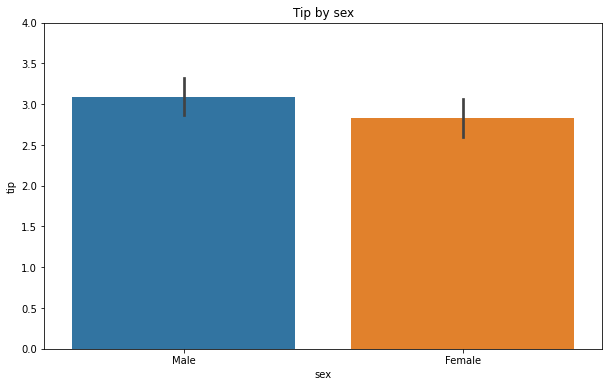

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(data = df, x = 'sex', y = 'tip')
plt.ylim(0, 4)
plt.title('Tip by sex')

Text(0.5, 1.0, 'Tip by day')

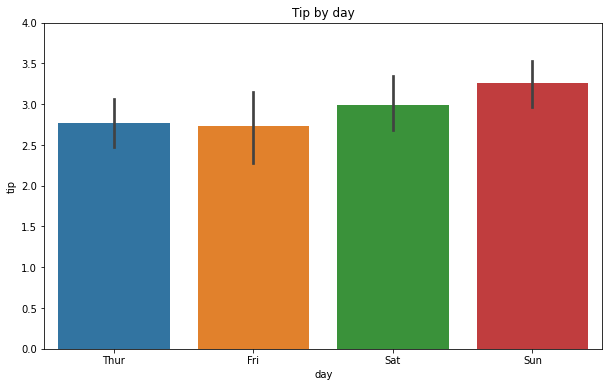

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='day', y='tip')
plt.ylim(0, 4)
plt.title('Tip by day')

<AxesSubplot:xlabel='day', ylabel='tip'>

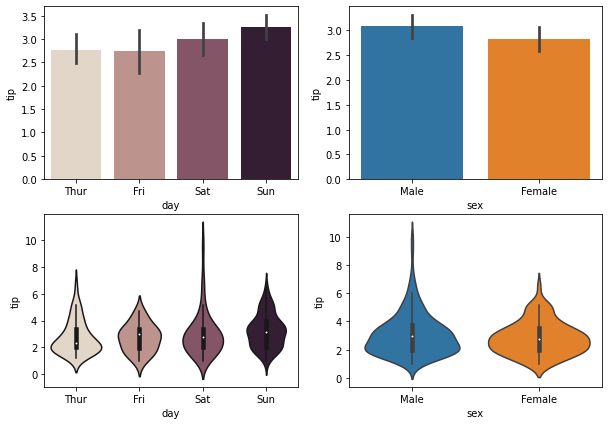

In [20]:
fig = plt.figure(figsize = (10, 7))

ax1 = fig.add_subplot(2, 2, 1)
sns.barplot(data = df, x = 'day', y = 'tip', palette = 'ch:.25')

ax2 = fig.add_subplot(2,2,2)
sns.barplot(data = df, x = 'sex', y = 'tip')

ax3 = fig.add_subplot(2,2,4)
sns.violinplot(data = df, x = 'sex', y = 'tip')

ax4 = fig.add_subplot(2, 2, 3)
sns.violinplot(data = df, x = 'day', y = 'tip', palette = 'ch:.25')

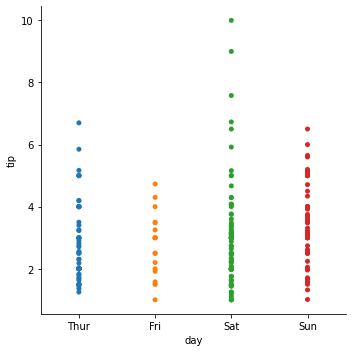

In [21]:
sns.catplot(x="day", y="tip", jitter=False, data=tips)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

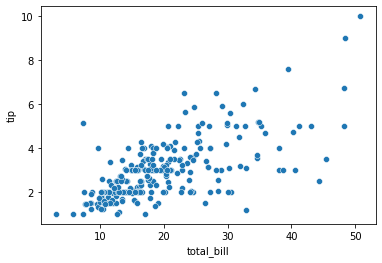

In [22]:
sns.scatterplot(data = df, x = 'total_bill', y = 'tip', palette="ch:r=-.2,d=.3_r")

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

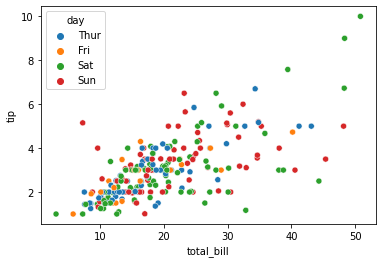

In [23]:
sns.scatterplot(data=df , x='total_bill', y='tip', hue='day')

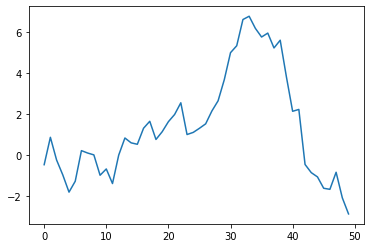

In [24]:
#np.random.randn 함수는 표준 정규분포에서 난수를 생성하는 함수입니다. 
#cumsum()은 누적합을 구하는 함수입니다.
plt.plot(np.random.randn(50).cumsum())

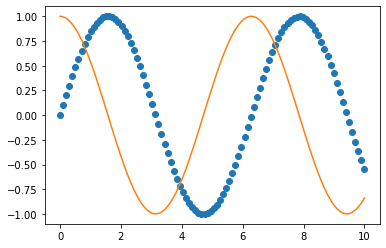

In [26]:
x = np.linspace(0, 10, 100)
plt.plot(x, np.sin(x), 'o')
plt.plot(x, np.cos(x))
plt.show()

<AxesSubplot:>

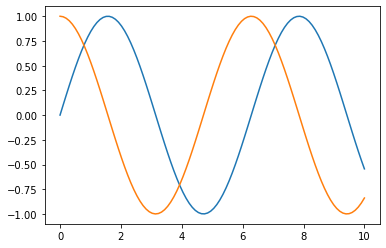

In [27]:
sns.lineplot(x=x, y=np.sin(x))
sns.lineplot(x=x, y=np.cos(x))

In [28]:
mu1, mu2, sigma = 100, 130, 15
x1 = mu1 + sigma*np.random.randn(10000)
x2 = mu2 + sigma*np.random.randn(10000)

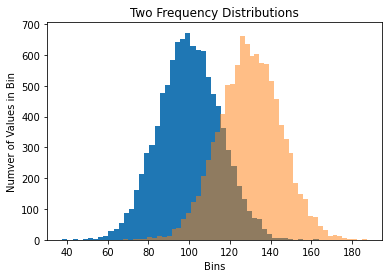

In [29]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

patches = ax1.hist(x1, bins = 50, density = False)
patches = ax1.hist(x2, bins = 50, density = False, alpha = 0.5)
ax1.xaxis.set_ticks_position('bottom')
ax1.yaxis.set_ticks_position('left')

plt.xlabel('Bins')
plt.ylabel('Numver of Values in Bin')
ax1.set_title('Two Frequency Distributions')

plt.show()

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

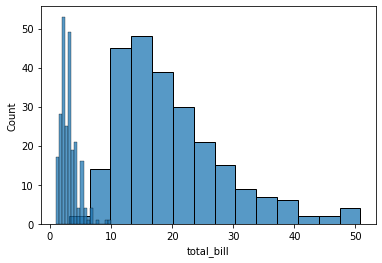

In [31]:
sns.histplot(df['total_bill'], label = 'total_bill')
sns.histplot(df['tip'], label = 'tip')

<AxesSubplot:>

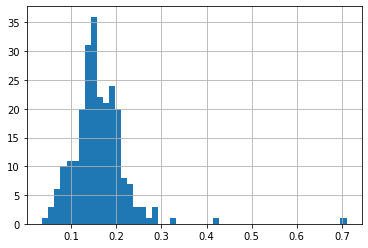

In [32]:
df['tip_pct'] = df['tip'] / df['total_bill']
df['tip_pct'].hist(bins = 50)

<AxesSubplot:ylabel='Density'>

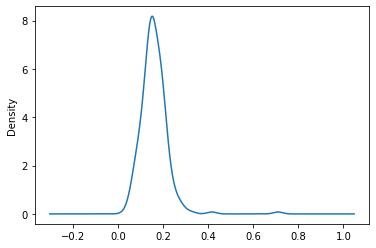

In [33]:
df['tip_pct'].plot(kind='kde') #kind='kde' : 확률밀도그래프

In [35]:
csv_path = "./data/flights.csv"
data = pd.read_csv(csv_path)
flights = pd.DataFrame(data)
flights

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
...,...,...,...
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390


<AxesSubplot:xlabel='year', ylabel='passengers'>

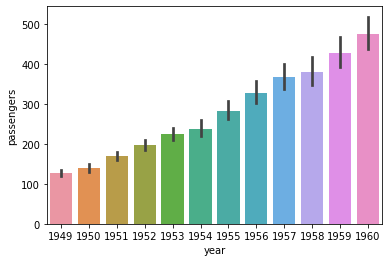

In [36]:
sns.barplot(data = flights, x = 'year', y = 'passengers')

<AxesSubplot:xlabel='year', ylabel='passengers'>

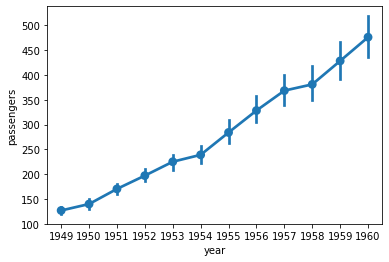

In [37]:
sns.pointplot(data = flights, x = 'year', y = 'passengers')

<AxesSubplot:xlabel='year', ylabel='passengers'>

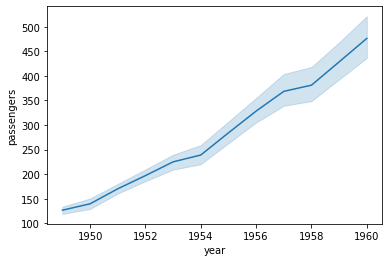

In [38]:
sns.lineplot(data = flights, x = 'year', y = 'passengers')

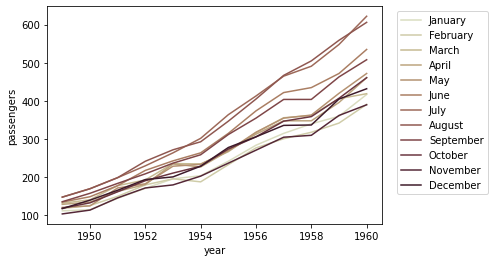

In [42]:
sns.lineplot(data = flights, x = 'year', y = 'passengers', hue = 'month', palette = 'ch:.50')
plt.legend(bbox_to_anchor = (1.03, 1), loc = 2) #legend 그래프 밖에 추가하기

<AxesSubplot:xlabel='passengers', ylabel='Count'>

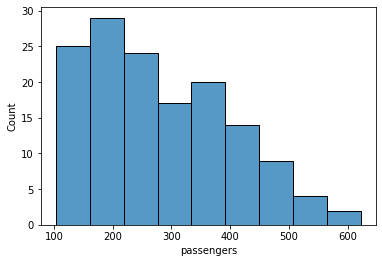

In [43]:
sns.histplot(flights['passengers'])

## Heatmap

In [45]:
pivot = flights.pivot(index = 'year', columns = 'month', values = 'passengers')
pivot

month,April,August,December,February,January,July,June,March,May,November,October,September
year,,,,,,,,,,,,
1949,129,148,118,118,112,148,135,132,121,104,119,136
1950,135,170,140,126,115,170,149,141,125,114,133,158
1951,163,199,166,150,145,199,178,178,172,146,162,184
1952,181,242,194,180,171,230,218,193,183,172,191,209
1953,235,272,201,196,196,264,243,236,229,180,211,237
1954,227,293,229,188,204,302,264,235,234,203,229,259
1955,269,347,278,233,242,364,315,267,270,237,274,312
1956,313,405,306,277,284,413,374,317,318,271,306,355
1957,348,467,336,301,315,465,422,356,355,305,347,404


<AxesSubplot:xlabel='month', ylabel='year'>

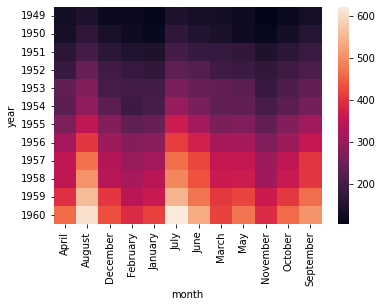

In [46]:
sns.heatmap(pivot)

<AxesSubplot:xlabel='month', ylabel='year'>

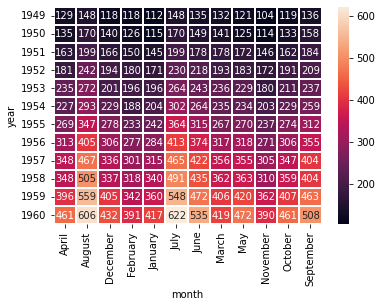

In [47]:
sns.heatmap(pivot, linewidths=.2, annot=True, fmt="d")

<AxesSubplot:xlabel='month', ylabel='year'>

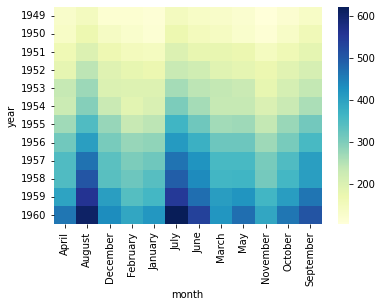

In [48]:
sns.heatmap(pivot, cmap="YlGnBu")